## 📊 Power System Faults – Data Visualization Techniques

This notebook demonstrates a wide variety of **data visualization techniques** using the **Power System Faults Dataset**.

The goal is to teach and showcase how different types of visualizations can help answer different analytical questions, such as:

- 📉 What is the trend of fault metrics over time?
- 🧮 How do values compare across fault types or weather conditions?
- 🔍 What is the distribution or composition of specific variables?
- 🔗 What relationships exist between operational metrics?


### 🔍 What’s Covered

#### 1. **Comparison of Metrics**
- Bar Chart (horizontal)
- Column Chart (vertical)
- Bullet Chart (KPI vs Target)

#### 2. **Composition of Data**
- Pie Chart
- Donut Chart
- Treemap

#### 3. **Change Over Time**
- Line Chart
- Area Chart
- Column Chart (time-based)

#### 4. **Relationships Between Metrics**
- Scatter Plot
- Bubble Chart
- Heatmap (correlation matrix)


These techniques are commonly used in:
- 📊 Business Intelligence (BI)
- ⚙️ Reliability Engineering
- 🛠️ Maintenance Planning
- 📈 Operations Monitoring

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

***
### 📥 Load the dataset from URL

In [ ]:
url = 'https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/refs/heads/main/datasets/fault_data.csv'
df = pd.read_csv(url)

# Parse coordinates
df[['Latitude', 'Longitude']] = df['Fault Location (Latitude, Longitude)']\
    .str.replace('[()]', '', regex=True).str.split(', ', expand=True).astype(float)

# Simulate fault date
df['Fault Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

df.head()

,Fault ID,Fault Type,"Fault Location (Latitude, Longitude)",Voltage (V),Current (A),Power Load (MW),Temperature (C),Wind Speed (km/h),Weather Condition,Maintenance Status,Component Health,Duration of Fault (hrs),Down time (hrs),Latitude,Longitude,Fault Date
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0,34.0522,-118.2437,2023-01-01
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0,34.0560,-118.2450,2023-01-02
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0,34.0525,-118.2440,2023-01-03
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0,34.0550,-118.2420,2023-01-04
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0,34.0545,-118.2430,2023-01-05


In [3]:
# # Load and parse
# df = pd.read_csv("data/fault_data.csv")
# df[['Latitude', 'Longitude']] = df['Fault Location (Latitude, Longitude)'].str.replace('[()]', '', regex=True).str.split(', ', expand=True).astype(float)
# df['Fault Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')


#### 🔢 Big Number with KPI

In [4]:
# KPI: Total Faults + Avg Downtime
total_faults = len(df)
avg_downtime = df['Down time (hrs)'].mean()

fig = go.Figure(go.Indicator(
    mode="number+delta",
    value=avg_downtime,
    delta={'reference': 5, 'increasing': {'color': "red"}},
    title={"text": "📉 Avg Downtime (hrs)"},
    number={"valueformat": ".2f"}
))
fig.update_layout(height=250)
fig.show()

***
### 📊 Compare Values Within and Between Groups
### Includes:
- Bar Chart (Horizontal)
- Column Chart (Vertical)
- Bullet Chart (KPI vs Target)


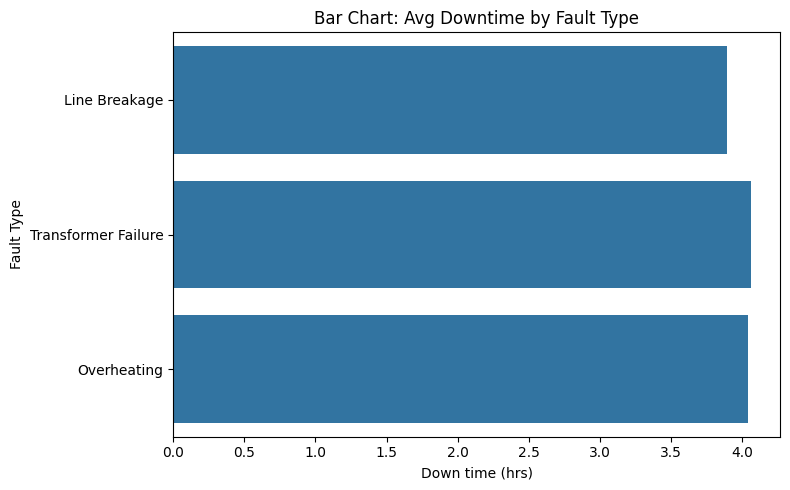

In [5]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Down time (hrs)', y='Fault Type', estimator='mean', errorbar=None)
plt.title("Bar Chart: Avg Downtime by Fault Type")
plt.tight_layout()
plt.show()

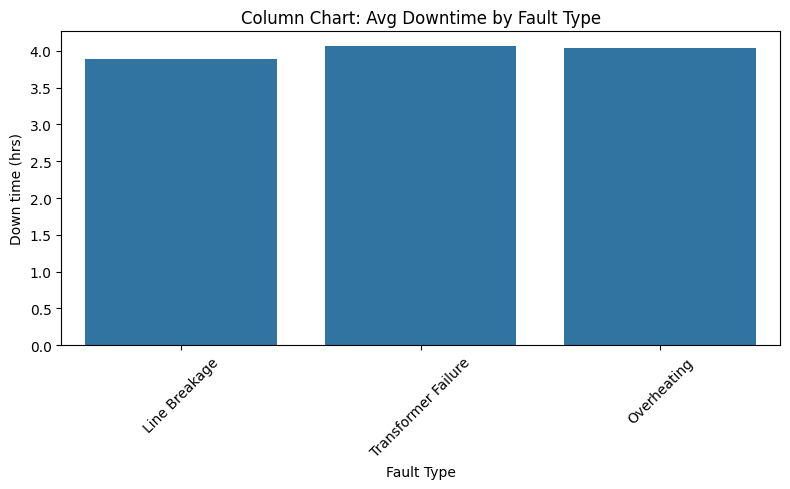

In [6]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Fault Type', y='Down time (hrs)', estimator='mean', errorbar=None)
plt.title("Column Chart: Avg Downtime by Fault Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# KPI = 4 hrs, Goal = 3 hrs
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode="number+gauge+delta",
    value=df['Down time (hrs)'].mean(),
    domain={'x': [0.1, 1], 'y': [0, 1]},
    title={"text": "🔫 Bullet Chart: Avg Downtime (hrs)"},
    delta={'reference': 3},
    gauge={
        'shape': "bullet",
        'axis': {'range': [0, 8]},
        'threshold': {'line': {'color': "red", 'width': 2}, 'value': 3},
        'bar': {'color': "lightblue"},
        'steps': [{'range': [0, 3], 'color': "lightgray"},
                  {'range': [3, 8], 'color': "gray"}]
    }
))
fig.show()

***
### 🧩 Show Relative Composition of Data
### Includes:
- Pie Chart
- Donut Chart
- Treemap

In [8]:
fig = px.pie(df, names='Weather Condition', title='☁️ Pie Chart: Faults by Weather')
fig.update_traces(textinfo='percent+label')
fig.show()

In [9]:
fig = px.pie(df, names='Fault Type', hole=0.4, title='🍩 Donut Chart: Faults by Type')
fig.update_traces(textinfo='percent+label')
fig.show()

In [10]:
fig = px.treemap(df, path=['Weather Condition', 'Fault Type'], title='🌲 Treemap: Weather > Fault Type')
fig.show()

****
### 📈 Display Change Over Time

Includes:
- Line Chart
- Area Chart
- Column Chart (Time-based)


In [11]:
df['Fault Date'] = pd.to_datetime(df['Fault Date'])
df = df.sort_values('Fault Date')
df.set_index('Fault Date', inplace=True)

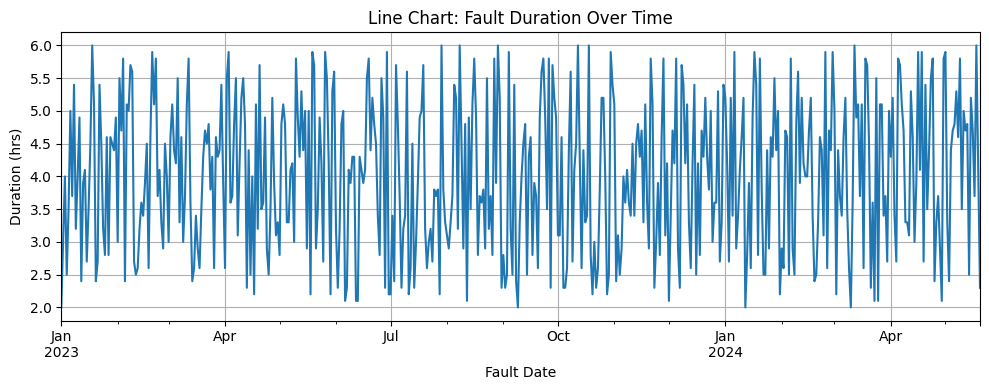

In [12]:
df['Duration of Fault (hrs)'].plot(figsize=(10,4), title="Line Chart: Fault Duration Over Time")
plt.ylabel("Duration (hrs)")
plt.grid(True)
plt.tight_layout()
plt.show()

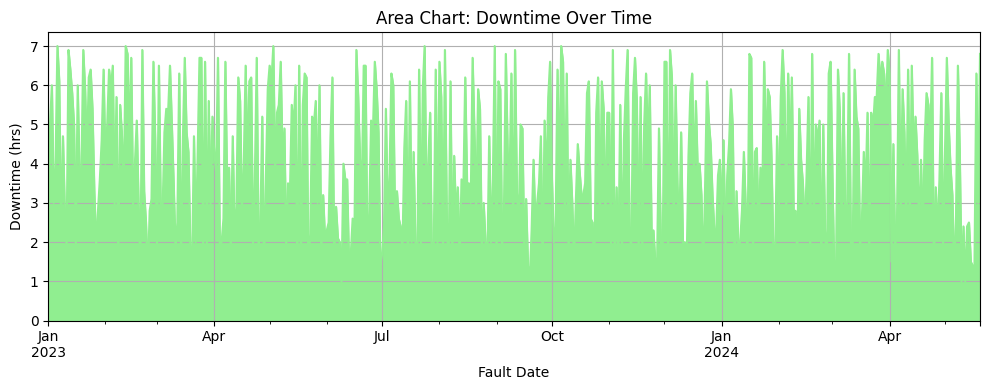

In [13]:
df['Down time (hrs)'].plot.area(figsize=(10,4), title="Area Chart: Downtime Over Time", color='lightgreen')
plt.ylabel("Downtime (hrs)")
plt.grid(True)
plt.tight_layout()
plt.show()

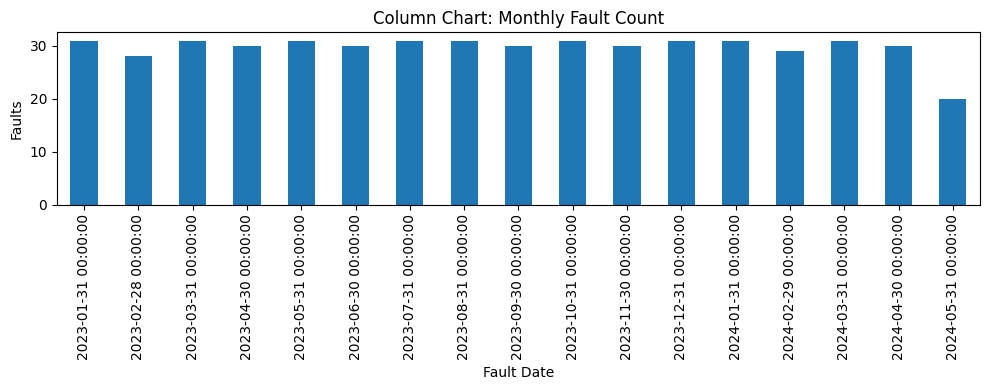

In [14]:
monthly_faults = df['Fault Type'].resample('ME').count()
monthly_faults.plot(kind='bar', figsize=(10,4), title="Column Chart: Monthly Fault Count")
plt.ylabel("Faults")
plt.tight_layout()
plt.show()

df.reset_index(inplace=True)

***
### 🔗 Explain Relationship Between Metrics

Includes:
- Scatter Plot
- Bubble Chart
- Heatmap

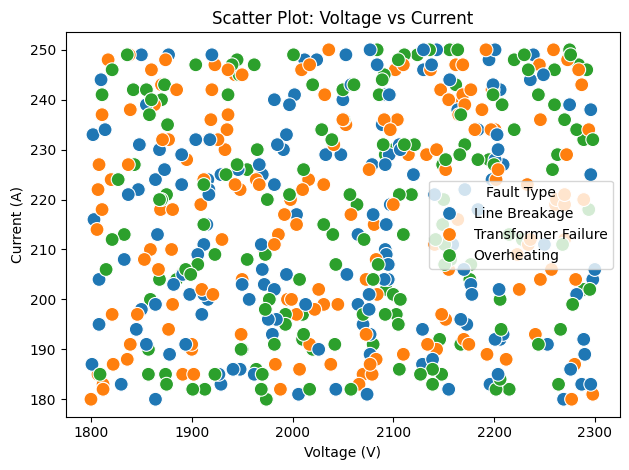

In [15]:
sns.scatterplot(data=df, x='Voltage (V)', y='Current (A)', hue='Fault Type', s=100)
plt.title("Scatter Plot: Voltage vs Current")
plt.tight_layout()
plt.show()

In [16]:
fig = px.scatter(df, x='Voltage (V)', y='Current (A)', size='Power Load (MW)', color='Fault Type',
                 title='Bubble Chart: Voltage vs Current by Load')
fig.show()

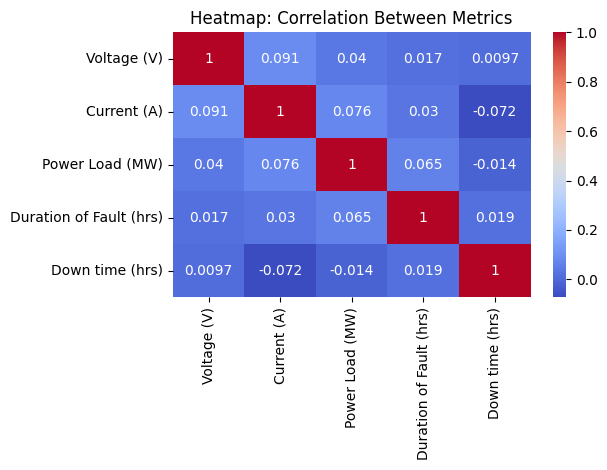

In [17]:
import numpy as np

corr = df[['Voltage (V)', 'Current (A)', 'Power Load (MW)', 'Duration of Fault (hrs)', 'Down time (hrs)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap: Correlation Between Metrics")
plt.tight_layout()
plt.show()